In [338]:
#import basic library for data reading, plotting, graph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [339]:
#import library for modelling, fit, train test etc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#import statemodels library
import statsmodels.api as sm

#import scaler library
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#import library for accuracy,precision and recall
from sklearn.metrics import accuracy_score,precision_score,recall_score

#import library for feature selection
from sklearn.feature_selection import RFE


#import library for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [340]:
#read datafile
loan=pd.read_csv("train.csv")
test=pd.read_csv("test_bqCt9Pv.csv")

In [341]:
#check first 5 rows of datafile
loan.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [342]:
#check datatype
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [343]:
#check data shape
print(loan.shape)

(233154, 41)


In [344]:
#check data description
loan.describe(percentiles=[0.25,0.5,0.7,0.8,0.9,0.95,0.99,1])

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
70%,583188.100000,58759.000000,7.680700e+04,82.010000,103.000000,22817.000000,86.000000,5137.000000,9.000000,2165.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.156000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
80%,606855.400000,62447.000000,8.309140e+04,84.740000,138.000000,23277.000000,86.000000,5993.000000,12.000000,2546.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.354000e+03,0.000000e+00,1.000000,0.000000,0.000000,1.000000
90%,630554.700000,68882.000000,9.914000e+04,87.950000,160.000000,23836.000000,86.000000,6753.000000,14.000000,2945.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.150400e+04,0.000000e+00,1.000000,0.000000,1.000000,1.000000
95%,642344.350000,74122.350000,1.096800e+05,89.380000,249.000000,24122.000000,86.000000,6942.000000,16.000000,3186.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.637645e+04,0.000000e+00,2.000000,1.000000,1.000000,1.000000


In [345]:
#Check data NA values
loan.isnull().sum()
#we can see only Employment.Type colum has lot of null values
#other columns data is clean

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [346]:
test.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [347]:
# filling the missing values in the Employment.

#the empty values must be the people who don't  work at all that's why it is empty
# let's fill unemployed in the place of Null values

loan['Employment.Type'].fillna('Unemployed', inplace = True)
test['Employment.Type'].fillna('Unemployed', inplace = True)

In [348]:
#We lost 7661 rows but our data is clean.
loan.shape

(233154, 41)

In [349]:
#Check data NA values again
loan.isnull().sum()
#We can see total clean data here

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [350]:
#check if any duplicate data is present
loan.duplicated().sum()
#so, there is no duplicate rows

0

In [351]:
#check if any duplicate value in UniqueID
loan['UniqueID'].duplicated().sum()
#So, we can consider UniqueID as dataframe ID

0

#Outlier treatment
disbursed_amount_q1=loan.disbursed_amount.quantile(0.25)
disbursed_amount_q3=loan.disbursed_amount.quantile(0.75)

IQR=disbursed_amount_q3-disbursed_amount_q1

loan=loan[(loan.disbursed_amount>=disbursed_amount_q1-1.5*IQR)]
loan=loan[(loan.disbursed_amount<=disbursed_amount_q3+1.5*IQR)]






#Outlier treatment
asset_cost_q1=loan.asset_cost.quantile(0.25)
asset_cost_q3=loan.asset_cost.quantile(0.75)

IQR=asset_cost_q3-asset_cost_q1

loan=loan[(loan.asset_cost>=asset_cost_q1-1.5*IQR)]
loan=loan[(loan.asset_cost<=asset_cost_q3+1.5*IQR)]


In [352]:
loan.shape
#Still now we have 86% data. 
#So, we have enough data for analysis

(233154, 41)

In [353]:
#Lets check outlier again
loan.describe(percentiles=[0.25,0.5,0.7,0.8,0.9,0.95,0.99,1])

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
70%,583188.100000,58759.000000,7.680700e+04,82.010000,103.000000,22817.000000,86.000000,5137.000000,9.000000,2165.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.156000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
80%,606855.400000,62447.000000,8.309140e+04,84.740000,138.000000,23277.000000,86.000000,5993.000000,12.000000,2546.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.354000e+03,0.000000e+00,1.000000,0.000000,0.000000,1.000000
90%,630554.700000,68882.000000,9.914000e+04,87.950000,160.000000,23836.000000,86.000000,6753.000000,14.000000,2945.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.150400e+04,0.000000e+00,1.000000,0.000000,1.000000,1.000000
95%,642344.350000,74122.350000,1.096800e+05,89.380000,249.000000,24122.000000,86.000000,6942.000000,16.000000,3186.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.637645e+04,0.000000e+00,2.000000,1.000000,1.000000,1.000000


In [354]:
unique_id= test['UniqueID']
y_train = loan.iloc[:, -1]
train = loan.drop(['loan_default'], axis = 1)
data = pd.concat([train, test], axis = 0)


In [355]:
#Outlier treatment
disbursed_amount_q1=data.disbursed_amount.quantile(0.25)
disbursed_amount_q3=data.disbursed_amount.quantile(0.75)

IQR=disbursed_amount_q3-disbursed_amount_q1

data=data[(data.disbursed_amount>=disbursed_amount_q1-1.5*IQR)]
data=data[(data.disbursed_amount<=disbursed_amount_q3+1.5*IQR)]






#Outlier treatment
asset_cost_q1=data.asset_cost.quantile(0.25)
asset_cost_q3=data.asset_cost.quantile(0.75)

IQR=asset_cost_q3-asset_cost_q1

data=data[(data.asset_cost>=asset_cost_q1-1.5*IQR)]
data=data[(data.asset_cost<=asset_cost_q3+1.5*IQR)]

In [356]:
#There are many data types which are not correct, Let's correct wrong data types
data['Date.of.Birth']=pd.to_datetime(data['Date.of.Birth'])
data['DisbursalDate']=pd.to_datetime(data['DisbursalDate'])
data['Year_of_birth']=data['Date.of.Birth'].dt.year
data['DisbursalMonth']=data['DisbursalDate'].dt.month

In [357]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Year_of_birth,DisbursalMonth
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1984,3
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,...,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1985,9
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1985,1
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,...,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1993,10
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1977,9


In [358]:
#Just extract year from below columns
data['CREDIT.HISTORY.LENGTH'] = data['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0])
data['CREDIT.HISTORY.LENGTH'] = data['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split('yrs')[0])

data['AVERAGE.ACCT.AGE'] = data['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0])
data['AVERAGE.ACCT.AGE'] = data['AVERAGE.ACCT.AGE'].apply(lambda x: x.split('yrs')[0])

In [359]:
#Change datatype of CREDIT.HISTORY.LENGTH and AVERAGE.ACCT.AGE to integer
data['CREDIT.HISTORY.LENGTH']=data['CREDIT.HISTORY.LENGTH'].astype(int)
data['AVERAGE.ACCT.AGE']=data['AVERAGE.ACCT.AGE'].astype(int)

In [360]:
#So, now all the dataframes looks good


data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                148302
C-Very Low Risk                                             21259
A-Very Low Risk                                             19292
D-Very Low Risk                                             14656
B-Very Low Risk                                             12242
M-Very High Risk                                            11456
F-Low Risk                                                  10709
K-High Risk                                                 10668
H-Medium Risk                                                8948
E-Low Risk                                                   7417
I-Medium Risk                                                7238
G-Low Risk                                                   5128
J-High Risk                                                  4839
Not Scored: Sufficient History Not Available                 4391
Not Scored: Not Enough Info available on the customer        4274
Not Scored

In [361]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'Year_of_birth', 'DisbursalMonth'],
      dtype='object')

In [362]:
#Let's do dummy analysis
temp=pd.get_dummies(data['Employment.Type'],drop_first=True)

In [363]:
temp.head()

,Self employed,Unemployed
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0


In [364]:
data=pd.concat([data,temp],axis=1)

In [365]:
data.drop(['Employment.Type'],axis=1,inplace=True)

In [366]:
temp1=pd.get_dummies(data['PERFORM_CNS.SCORE.DESCRIPTION'],drop_first=True)

In [367]:
data=pd.concat([data,temp1],axis=1)

In [368]:
data.drop(['PERFORM_CNS.SCORE.DESCRIPTION'],axis=1,inplace=True)

In [369]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,DisbursalDate,...,K-High Risk,L-Very High Risk,M-Very High Risk,No Bureau History Available,Not Scored: More than 50 active Accounts found,Not Scored: No Activity seen on the customer (Inactive),Not Scored: No Updates available in last 36 months,Not Scored: Not Enough Info available on the customer,Not Scored: Only a Guarantor,Not Scored: Sufficient History Not Available
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,2018-03-08,...,0,0,0,1,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,2018-09-26,...,0,0,0,0,0,0,0,0,0,0
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,2018-01-08,...,0,0,0,1,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,2018-10-26,...,0,1,0,0,0,0,0,0,0,0
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,2018-09-26,...,0,0,0,1,0,0,0,0,0,0


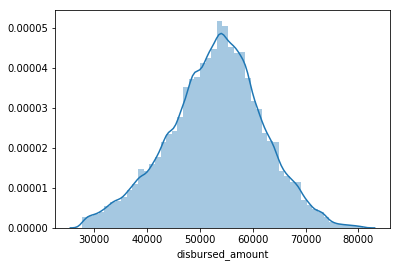

In [370]:
sns.distplot(data['disbursed_amount'])

In [371]:
# some attributes are categorical but they are in integer so let's convert them into category

data['branch_id'] = data['branch_id'].astype('category')
data['manufacturer_id'] = data['manufacturer_id'].astype('category')
data['State_ID'] = data['State_ID'].astype('category')

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['branch_id'] = le.fit_transform(data['branch_id'])
data['manufacturer_id'] = le.fit_transform(data['manufacturer_id'])
data['State_ID'] = le.fit_transform(data['State_ID'])


# removing unnecassary columns
data = data.drop(['supplier_id', 'Current_pincode_ID', 'Date.of.Birth', 'DisbursalDate', 'Employee_code_ID'], axis = 1)

In [372]:

num_cols=['disbursed_amount', 'asset_cost', 'ltv',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
        'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES']

In [373]:
#scale variable before using it on modelling
data[num_cols].iloc[:5,20:35]

,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,0,0,0,0,0,0,0,0,0
1,0,0,1991,0,0,1,1,1,0
2,0,0,0,0,0,0,0,0,0
3,0,0,31,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,1


In [374]:
scaler=StandardScaler()


In [375]:
# separating train and test datasets from data

x_train = data.iloc[:233154,:]
x_test = data.iloc[233154:,:]

# checking the shape of train and test
print("Shape of train :", x_train.shape)
print("Shape of test :", x_test.shape)

Shape of train : (233154, 56)
Shape of test : (66258, 56)


In [376]:
!pip install  imbalanced-learn

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [377]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample = SMOTE().fit_sample(x_train, y_train.values.ravel()) 

# checking the shape of x_resample and y_resample
print("Shape of x:", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x: (365086, 56)
Shape of y: (365086,)


In [378]:
x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

In [379]:
sc = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [380]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [381]:
#let's create  model
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)




RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [382]:
y_pred=rfc.predict(x_valid)

In [383]:
print(y_pred.shape)
print(y_test.shape)

(73018,)
(60569,)


In [384]:
print("Accuracy is: ",accuracy_score(y_valid,y_pred))

Accuracy is:  0.8420937303130734


In [385]:
print("Training Accuracy: ", rfc.score(x_train, y_train))
print('Testing Accuarcy: ', rfc.score(x_valid, y_valid))

Training Accuracy:  0.9846337154361313
Testing Accuarcy:  0.8420937303130734


In [386]:
cr=classification_report(y_valid,y_pred)

In [387]:
print(cr)

             precision    recall  f1-score   support

          0       0.78      0.96      0.86     36647
          1       0.95      0.72      0.82     36371

avg / total       0.86      0.84      0.84     73018



In [388]:
cm=confusion_matrix(y_valid,y_pred)

In [389]:
print(cm)

[[35218  1429]
 [10101 26270]]


In [390]:
precision_score(y_valid,y_pred)

0.9484096898805011

In [391]:
recall_score(y_valid,y_pred)

0.7222787385554426

In [392]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [393]:
from sklearn import metrics

In [394]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid,y_pred, drop_intermediate = False )

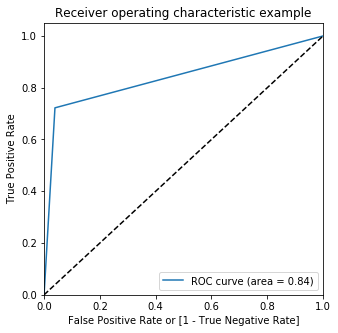

In [395]:
draw_roc(y_valid,y_pred)

In [396]:
# let's predict for the tests set

y_pred_rf = rfc.predict(x_test)

In [397]:
final=pd.DataFrame({'UniqueID':unique_id,'loan_default': y_pred_rf})

ValueError: array length 66258 does not match index length 112392

In [ ]:
final.set_index(['UniqueID'],inplace=True)

In [ ]:
final.to_csv("final.csv")